<a href="https://colab.research.google.com/github/tbeucler/2023_MLEES_JB/blob/main/ML_EES/IP/W1_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercises) Text and Tabular Files

## Warm-up

**1. Write a `while` loop to display the values of the ratings of an album playlist stored in the list <code>PlayListRatings</code>. If the score is less than 6, exit the loop. The list <code>PlayListRatings</code> is given by: <code>PlayListRatings = [10, 9.5, 10, 8, 7.5, 5, 10, 10]</code>**

In [ ]:
# Write your code here
PlayListRating = [10, 9.5, 10, 8, 7.5, 5, 10, 10]

# Hint: Use list indexing as a criteria (size of your list)
indx = 0
while ____<len(______________):
  if ____________[____]<6:
    ____
  else:
    print(_________[____])
  ____+=1

**2. Repeat what you just did, this time using a `for` loop**

In [ ]:
for ____ in range(len(______________)):
  if _____________[____]<6:
    ____
  else:
    print(_____________[____])

**3. Write a `for` loop that prints out the following list: <code>squares=['red', 'yellow', 'green', 'purple', 'blue']</code>**

In [ ]:
squares = [] # An empty list
for ___,___ in enumerate([_____________________]):
  squares.append(___) # Here you add (append) the elements one by one to the empty list

print(squares)

Below, we import Python libraries that contain classes/functions that will be useful to both exercises.

In [ ]:
import csv
import pandas as pd
import numpy as np

## Exercise 1 (Text File)
Let's use what we have just learned to write a slightly more complex file.
1.   Create a file called "ans.txt"
2.   Write the following sentence "This is my first I/O exercise."
3.   Save the file
4.   Read the file again, add 3 more new sentences: "I just remembered that pi is approximately 3.1416", "Writing this to this file ", "is a piece of cake!"

It is impossible to remember the exact value of pi, but we may want to change the accuracy of the pi we print at will. So let's import [math](https://docs.python.org/3/library/math.html) to get the exact pi value to output pi with the desired accuracy.



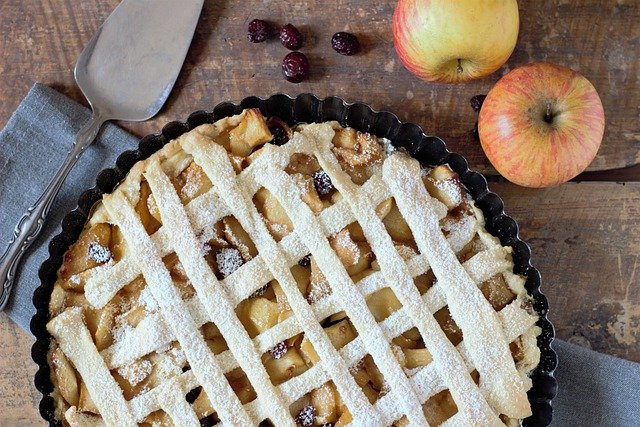

Image by <a href="https://pixabay.com/users/einladung_zum_essen-3625323/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5479993">Bernadette Wurzinger</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5479993">Pixabay</a>

```{hint}
How can we change accuracy? Just change the integer that comes before f!
:1f => 0.1,
:2f => 0.11, ...
```

### Code

In [ ]:
import math
# Hints: Please don't remove the \n that your TA carefully put in the code!
with open(________, '_', encoding="utf-8") as fhandler:
  fhandler.write('______________________\n')

with open(________, '__', encoding="utf-8") as fhandler:
  print(fhandler.readlines())
  # Your TA would like accuracy to the fourth decimal here.
  firstline = f'____________________________ {math.pi:._f}\n'
  secondline = '_____________________________\n'
  thirdline = '___________________________\n'
  fhandler.writelines([___,____,___])
  # Go to the beginning of file
  fhandler.seek(0)
  # Print the content of file
  print(fhandler.readlines())

## Exercise 2 (Tabular File)
In the demonstration we showed you how to extract 5 rows and write them to a new CSV file. Here, we provide you with data rows that encode surface weather observations recorded every hour. The data span from January to August.

What if we want to extract January, February, and March data and save them in smaller files separated by month?

Here we provide you with some functions to extract the indices of the first and final instance of the data on a given month in the tabular data. You don't need to change anything in these functions; in this exercise, you just need to save the monthly files based on the output indices.

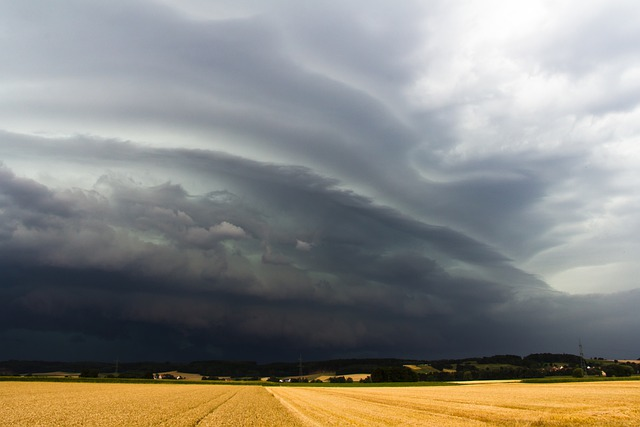

Image by <a href="https://pixabay.com/users/dertobisturmjagd-7096811/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3176544">Tobias Hämmer</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3176544">Pixabay</a>

In [ ]:
import pooch
import urllib.request

#url = 'https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETDZdgCkWbZLiv_LP6HKCOAB2NP7H0tUTLlP_stknqQHGw?e=2lFo1x'

datafile = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETDZdgCkWbZLiv_LP6HKCOAB2NP7H0tUTLlP_stknqQHGw?download=1',
                          known_hash='c7676360997870d00a0da139c80fb1b6d26e1f96050e03f2fed75b921beb4771')

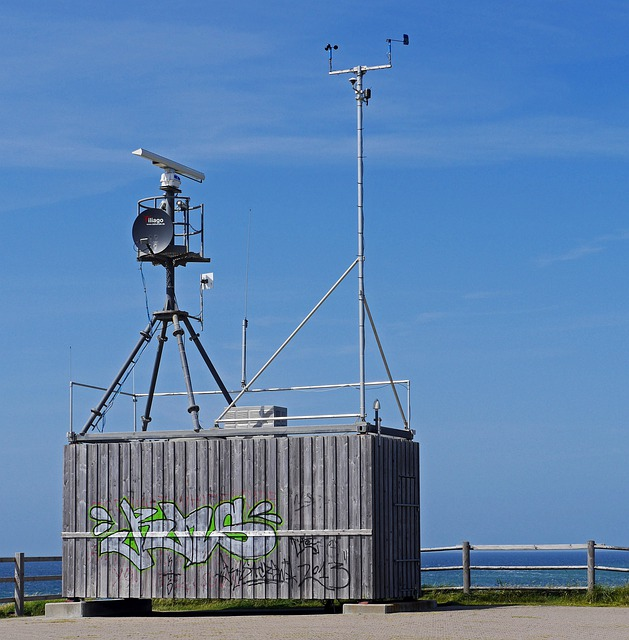

Image by <a href="https://pixabay.com/users/hpgruesen-2204343/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2373839">Erich Westendarp</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2373839">Pixabay</a>

Complete the code below with the appropriate filename:

In [ ]:
row = [] # Initializes row to an empty list
with open(___________, 'r') as fh:
  reader = csv.reader(fh)
  for info in reader:
    row.append(info)

You can simply execute the two following cells:

In [ ]:
def output_monthindices(month=None):
  """
  This function takes a string "month" as input (e.g., January)
  and outputs the first and last indices of that month
  """
  test = [rowobj[1].split(' ')[0].split('-')[1] for rowobj in row[1:]]
  truefalse = []
  for obj in test:
    if obj==month:
      truefalse.append(obj)
    else:
      truefalse.append(np.nan)
  return pd.Series(truefalse).first_valid_index(),pd.Series(truefalse).last_valid_index()

In [ ]:
# Here, we output the first and last indices of Jan/Feb/Mar
Jan_index = output_monthindices(month='01')
Feb_index = output_monthindices(month='02')
Mar_index = output_monthindices(month='03')

Here, let's extract portions of the `row` list with the monthly index values we have.

Write these extracts to three new files: `jan.csv`,`feb.csv`,`mar.csv` using a loop.

In [ ]:
savefile = [_,_,_] # List containing the filenames
indices = [Jan_index, Feb_index, Mar_index]
for i in range(_):
  with open(__, 'w') as fh:
    writer = csv.writer(fh)
    for ____ in range(indices[_][0],indices[_][1]):
      writer.writerow(row[____])

In [ ]:
#@title Answer
savefile = ['jan.csv','feb.csv','mar.csv']
indices = [Jan_index, Feb_index, Mar_index]
for i in range(3):
  with open(savefile[i], 'w') as fh:
    writer = csv.writer(fh)
    for num in range(indices[i][0],indices[i][1]):
      writer.writerow(row[num])

Let's check that we properly wrote our weather data to the appropriate file. Just run the cell below to check 😃

In [ ]:
#@title Let's print the dates in March
df = pd.read_csv(savefile[2]) # Reads the file using pandas
df.head(3) # Print the first three lines of the file

Congratulations! You just finished some programming tasks with Python!
Excited? Stay along for the ride, we have more exercises for you in the next section!
Our next exercise will be on our solar system! 🪐